In [1]:
import pandas as pd
import pandas.io.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [2]:
# get data from yahoo finance
def get_data(symbol, start, end):
    return web.DataReader(symbol, 'yahoo', start, end)
symbol = '002022.SZ'
start = '20050101'
end = '20131231'
data = get_data(symbol, start, end)

In [3]:
def tr(data):
    ''' generate true range TR tech signal'''
    name = 'prev_value'
    data[name] = data.shift(1).Close
    hh = data[['High', name]].max(axis=1)
    ll = data[['Low', name]].min(axis=1)
    del data[name]
    return(hh -ll)

tr(data)
data['TR'] = tr(data)

In [43]:
def ma(data, timespan):
    return pd.rolling_mean(data['Close'], timespan)
short_span = 30
long_span = 100
data['sma'] = ma(data, short_span)
data['lma'] = ma(data, long_span)

In [44]:
data['atr'] = pd.rolling_mean(data['TR'], short_span)
data.tail

<bound method DataFrame.tail of              Open   High    Low ...     lma   atr  sig
Date                            ...                   
2005-10-10  15.56  15.56  15.56 ...     NaN   NaN    1
2005-10-11  15.56  15.56  15.56 ...     NaN   NaN    1
2005-10-12  15.56  15.56  15.56 ...     NaN   NaN    1
2005-10-13  15.56  15.56  15.56 ...     NaN   NaN    1
2005-10-14  15.56  15.56  15.56 ...     NaN   NaN    1
...           ...    ...    ... ...     ...   ...  ...
2013-12-25  16.82  16.82  16.82 ...   16.03  0.42    1
2013-12-26  16.82  16.82  16.82 ...   16.03  0.40    1
2013-12-27  16.82  16.82  16.82 ...   16.03  0.39    1
2013-12-30  16.82  16.82  16.82 ...   16.01  0.37    1
2013-12-31  16.82  16.82  16.82 ...   16.01  0.36    1

[2106 rows x 11 columns]>

In [45]:
data.drop(data[0:long_span].index, inplace = True)
data.head

<bound method DataFrame.head of              Open   High    Low ...     lma   atr  sig
Date                            ...                   
2006-02-27  14.20  14.38  14.05 ...   13.92  0.51    0
2006-02-28  14.02  14.30  13.97 ...   13.91  0.50    0
2006-03-01  14.36  14.96  14.32 ...   13.90  0.51    1
2006-03-02  14.91  15.02  14.55 ...   13.89  0.51    1
2006-03-03  14.90  15.75  14.81 ...   13.89  0.53    1
...           ...    ...    ... ...     ...   ...  ...
2013-12-25  16.82  16.82  16.82 ...   16.03  0.42    1
2013-12-26  16.82  16.82  16.82 ...   16.03  0.40    1
2013-12-27  16.82  16.82  16.82 ...   16.03  0.39    1
2013-12-30  16.82  16.82  16.82 ...   16.01  0.37    1
2013-12-31  16.82  16.82  16.82 ...   16.01  0.36    1

[2006 rows x 11 columns]>

In [46]:
def gen_sig(data):
    data['sig']= 0
    data.loc[(data.Close > data.sma) & (data.sma > data.lma), 'sig'] = 1

gen_sig(data)
data.tail(n=20)


             Open   High    Low ...     lma   atr  sig
Date                            ...                   
2013-12-04  16.67  17.09  16.60 ...   16.09  0.48    0
2013-12-05  16.60  16.76  16.36 ...   16.10  0.49    0
2013-12-06  16.50  16.65  16.26 ...   16.09  0.46    0
2013-12-09  16.30  17.06  16.30 ...   16.09  0.47    0
2013-12-10  17.00  17.08  16.75 ...   16.08  0.45    0
...           ...    ...    ... ...     ...   ...  ...
2013-12-25  16.82  16.82  16.82 ...   16.03  0.42    1
2013-12-26  16.82  16.82  16.82 ...   16.03  0.40    1
2013-12-27  16.82  16.82  16.82 ...   16.03  0.39    1
2013-12-30  16.82  16.82  16.82 ...   16.01  0.37    1
2013-12-31  16.82  16.82  16.82 ...   16.01  0.36    1

[20 rows x 11 columns]

In [47]:
entry_days = data[data.sig > data.sig.shift()].index
i = data.index.get_loc(entry_days[0])
data[i-2 :i + 20]

             Open   High    Low ...     lma   atr  sig
Date                            ...                   
2006-02-27  14.20  14.38  14.05 ...   13.92  0.51    0
2006-02-28  14.02  14.30  13.97 ...   13.91  0.50    0
2006-03-01  14.36  14.96  14.32 ...   13.90  0.51    1
2006-03-02  14.91  15.02  14.55 ...   13.89  0.51    1
2006-03-03  14.90  15.75  14.81 ...   13.89  0.53    1
...           ...    ...    ... ...     ...   ...  ...
2006-03-22  15.50  15.66  15.36 ...   14.00  0.50    1
2006-03-23  15.30  15.78  15.30 ...   14.04  0.51    1
2006-03-24  15.69  15.75  15.30 ...   14.07  0.51    1
2006-03-27  15.25  15.38  15.02 ...   14.10  0.50    1
2006-03-28  15.20  15.55  15.16 ...   14.12  0.50    1

[22 rows x 11 columns]

In [48]:
exit_days = data[data.sig < data.sig.shift()].index
exit_days[1]

i = data.index.get_loc(exit_days[0])
data[i-2 :i + 20]

print(entry_days)
print(exit_days)

DatetimeIndex(['2006-03-01', '2006-09-27', '2006-10-24', '2006-11-22',
               '2006-11-27', '2007-03-15', '2007-06-21', '2007-07-19',
               '2007-08-20', '2007-09-27', '2007-10-09', '2007-10-17',
               '2007-12-10', '2007-12-24', '2008-03-03', '2008-12-16',
               '2009-01-12', '2009-01-23', '2009-02-09', '2009-02-19',
               '2009-10-09', '2009-10-19', '2009-12-30', '2010-01-14',
               '2010-03-24', '2010-04-08', '2010-04-16', '2010-10-08',
               '2010-10-25', '2010-12-13', '2012-04-20', '2012-05-10',
               '2012-05-31', '2012-07-19', '2012-09-03', '2012-09-07',
               '2013-01-28', '2013-03-20', '2013-03-28', '2013-04-03',
               '2013-04-18', '2013-05-02', '2013-07-02', '2013-07-12',
               '2013-08-19', '2013-08-27', '2013-09-24', '2013-12-19'],
              dtype='datetime64[ns]', name=u'Date', freq=None, tz=None)
DatetimeIndex(['2006-04-20', '2006-10-23', '2006-11-03', '2006-11-23',
    

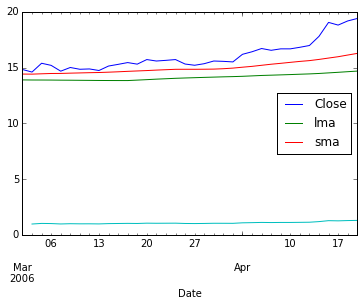

In [56]:
from datetime import timedelta 
def get_trans(data, index, entry_days, exit_days):
    if index >= len(exit_days): return None
    start_date = entry_days[index]
    end_date = exit_days[index]
    if start_date > end_date and index < len(exit_days)-1:
        end_date = exit_days[index + 1]
    elif start_date > end_date:
        end_date = data.index[-1]
    
    end_date = end_date - timedelta(days=1)
    return data[start_date : end_date ].copy()

#print(entry_days[0], exit_days[0])
#entry_days[0] > exit_days[0]
get_trans(data, 0, entry_days, exit_days)

get_trans(data, 1, entry_days, exit_days).tail()

trans_1 = get_trans(data, 0, entry_days, exit_days)
price_change = trans_1['Adj Close'].pct_change()
ret = ( price_change + 1).cumprod()
trans_1[['Close', 'lma', 'sma']].plot()
ret.plot()
#trans_1.tail()
# and ax2 is in the lower row

In [107]:
def get_first_date(dates):
    if len(dates) > 0 :
        return dates[0]
    else:
        return None
    
def get_not_none_date(date1, date2):
    if date1 is None:
        return date2
    else:
        return date1

def get_stopl_date(data, stop_at_pct):
    '''获取止损时间
    data 交易信号存在数据
    stop_at_pct 止损百分比
    '''
    data['cum_prod'] = (data['Close'].pct_change() + 1).cumprod()
    stops = data[data.cum_prod < stop_at_pct].index
    return get_not_none_date(get_first_date(stops), data.index[-1])
  
# test for get_stopl_date function
trans2 = get_trans(data, 1, entry_days, exit_days)
print(get_stopl_date(trans2, 0.97))
np.min(trans2.cum_prod)



2006-10-20 00:00:00


0.9894736768236331

In [51]:

def get_trailstop_date(data, trailstop):
    '''获取跟踪止损日期'''
    
    data['cum_max'] = data['Close'].cummax()
    stops = data[data['cum_max']-data['Close'] > trailstop].index
    return get_not_none_date(get_first_date(stops), data.index[-1])

trailstop =  trans2.iloc[0].atr
print(trailstop)
ts_at = get_trailstop_date(trans2, trailstop)
print(ts_at)
if not ts_at is None:
   print(trans2.loc[ts_at, 'cum_max'], trans2.loc[ts_at, 'Close'])

trans2['Close']

0.378999666667
2006-10-12 00:00:00
(15.800000000000001, 14.210000000000001)


Date
2006-09-27    14.25
2006-09-28    14.59
2006-09-29    14.45
2006-10-02    14.45
2006-10-03    14.45
              ...  
2006-10-16    14.10
2006-10-17    14.10
2006-10-18    14.20
2006-10-19    14.69
2006-10-20    14.37
Name: Close, dtype: float64

In [132]:
stoplevel = 0.95
ts_factor = 3

def plot_tran(data, stop_at, trails_at):
    data[['Close', 'lma', 'sma']].plot()
    pd.Series(data.Close[stop_at], index=[stop_at]).plot(  style='go')
    pd.Series(data.Close[trails_at], index=[trails_at]).plot( style='r^')


def trade_sum(data):
    ret_pct = (data.Close.pct_change()+1).cumprod()
    last_ret = ret_pct[-1]
    drowndown = data.Close/data.Close.cummax()
    max_dd = 1 - np.min(drowndown)
    max_ret = np.max(ret_pct)

    return pd.DataFrame({'Max Return':[max_ret], 'Max DrownDown':[max_dd],'Last Return':[last_ret]})

def sum_tran(fsum):
    fsum = fsum.dropna(subset=['Last Return'], how= 'all')
    loss_count = len(fsum[fsum['Last Return']<1])
    win_count = len(fsum[fsum['Last Return']>1])
    print("trans count {0:d}, loss count {1:d}, win count {2:d}".format( len(fsum), loss_count, win_count) )
    print("Max drowndown {0} Max Return  {1} Mean Return {2}".format(np.max(fsum['Max DrownDown']), np.max(fsum['Last Return']), np.mean(fsum['Last Return'])))

def do_back_test(data, sspan, lspan,stoplvl, trails_factor):
    def gen_tech_sig():
        tr(data)
        data['lma'] = ma(data, lspan)
        data['sma'] = ma(data, sspan)
        data['atr'] = pd.rolling_mean(data['TR'], sspan)
        data.drop(data[0:lspan].index, inplace = True)
    
    def get_sig_days(direction = 1):
        if direction == 1 :
            return data[data.sig > data.sig.shift()].index
        else:
            return data[data.sig < data.sig.shift()].index
    
    def test_tran(index, fsum):
        tran = get_trans(data, i, entry_days, exit_days)
        if tran is None: return

        term_at = tran.index[-1]
        if stoplvl!= 1 : # do  not use stop loss 
            stop_at = get_stopl_date(tran, 0.95)
        else:
            stop_at = term_at

        trailstop = ts_factor* tran.iloc[0].atr
        if trails_factor != 0: # do not use trail stop
            trails_at = get_trailstop_date(tran, trailstop)
        else:
            trails_at = term_at
        
        real_stop_at = min(stop_at, trails_at, term_at)
        #print('term at {0}, real stop at:{1}'.format(term_at, real_stop_at))
        #plot_tran(tran, stop_at, trails_at)
        ts = trade_sum(tran[:real_stop_at])
        if fsum  is None: 
            fsum = ts
        else:
            fsum = pd.concat([full_sum, ts], axis=0)

    gen_tech_sig()
    gen_sig(data)
    entry_days = get_sig_days()
    exit_days = get_sig_days(0)
    fsum = None
    for i in range(0, len(entry_days)): test_tran(i, fsum)
    
        



ValueError: Wrong number of items passed 6, placement implies 7

In [149]:
ax1 = plt.subplot2grid(shape=(2,1), loc=(0,0))
ax2 = plt.subplot2grid(shape=(2,1), loc=(1,0))

vkhsw[['norm_ret', 'ret']].plot(ax = ax1)
vkhsw[[ 'long_ma', 'short_ma']].plot(ax = ax2)
trans_count = vkhsw[vkhsw.sig > vkhsw.shift().sig]

7

In [169]:
def gen_param_df(val_name, val):
    return pd.DataFrame({'key':np.ones(len(val)), val_name:val} )

def gen_params_matrix():
    sspan = range(10, 40, 5)
    ds = gen_param_df('sspan', sspan)

    lf = range(3, 6)
    dlf = gen_param_df('lf', lf)
    #len(range(10, 40, 5))


    stoploss = [0.96, 0.95, 0.94]

    dsl =gen_param_df('stopl', stoploss)

    trail_factor = range(0, 4)
    dtf = gen_param_df('trailf', trail_factor)
    temp1 = pd.merge(ds, dlf, on =['key'])
    temp2 = pd.merge( dsl,dtf, on=['key'])
    return pd.merge(temp1, temp2, on = ['key'])

temp = gen_params_matrix()
temp.lf = temp.lf * temp.sspan
temp

KeyError: ('sspan', 'lf', 'stopl', 'trailf')

In [160]:
 np.arange(100, 92, -1)/100.0

array([ 1.  ,  0.99,  0.98,  0.97,  0.96,  0.95,  0.94,  0.93])

In [152]:
trans_idx = (trans_count + exit_count).index

In [153]:
max_return = pd.Series([0.0]*len(trans_count))
max_drawdown = max_return.copy()
exit_return = max_drawdown.copy()
max_return

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: float64

In [154]:
for i in range(0, len(trans_idx)//2):
    idx = i *2
    trading_days = vkhsw[trans_idx[idx]:trans_idx[idx+1] ].copy()
    day_len = len(trading_days)
    trading_days.ret = (1+trading_days["Adj Close"].pct_change()).cumprod()
    trading_days.norm_ret = trading_days.ret /trading_days.ret.cummax()#use to calc rolling max
    max_return[i], max_drawdown[i], exit_return[i] = trade_summ(trading_days, trans_idx[idx+1])

In [155]:
trade_summary = pd.DataFrame([max_return, max_drawdown, exit_return])
trade_summary

      0     1     2  ...      4     5     6
0  1.27  0.98  1.14  ...   1.49  1.23  2.28
1  0.29  0.07  0.16  ...   0.23  0.20  0.53
2  0.91  0.91  1.02  ...   1.31  1.05  1.17

[3 rows x 7 columns]

In [29]:
last_return = exit_return.cumprod()

In [80]:

def trade_summ( data, at):
    max_ret = np.max(data.ret)
    max_dd = 1 - np.min(data.norm_ret)
    exit_ret = data.ret.loc[at]
    return (max_ret, max_dd, exit_ret)

In [122]:

stoploss = 0.95
for i in range(0, len(trans_idx)//2):
    idx = i *2
    trading_days = vkhsw[trans_idx[idx]:trans_idx[idx+1] ].copy()
    day_len = len(trading_days)
    trading_days.ret = (1+trading_days["Adj Close"].pct_change()).cumprod()
    trading_days.norm_ret = trading_days.ret /trading_days.ret.cummax()#use to calc rolling max
    
    # stop loss filter
    trading_days['stopex'] = 0 
    trading_days.loc[trading_days.ret < stoploss, 'stopex'] = 1
    stop_at = trading_days[trading_days.stopex == 1].index.min()
    print stop_at
    
    # trailing stop filter
    tr_stop = 3 * trading_days.loc[ trans_idx[idx], 'ATR']
    tr_sig = abs(trading_days.Close - trading_days.Close.cumsum()) > tr_stop 
    
    if  not stop_at.year > 0: stop_at = trans_idx[idx+1]
    stop_tds = trading_days[:stop_at].copy()            
    max_return[i], max_drawdown[i], exit_return[i] = trade_summ(stop_tds, stop_at)
    


2011-01-17 00:00:00
2011-12-13 00:00:00
2012-05-25 00:00:00
NaT
NaT
NaT
NaT


In [165]:
test = vkhsw['20111206': '20111220'].copy()
# test for trailing stop
test.loc[abs(test.Close - test.Close.cummax())>1, 'sig'] =1 

In [133]:
test['prevClose'] = test.shift(1).Close
test

             Open   High    Low    ...      norm_ret  stopex  prevClose
Date                               ...                                 
2011-12-06  12.30  12.45  12.16    ...          0.87       1        NaN
2011-12-07  12.42  12.75  12.35    ...          0.89       1      12.38
2011-12-08  12.51  12.66  12.16    ...          0.87       1      12.61

[3 rows x 14 columns]

In [135]:
test[['High', 'prevClose']].max(axis=1) - test[['Low', 'prevClose']].min(axis=1)

Date
2011-12-06    0.29
2011-12-07    0.40
2011-12-08    0.50
dtype: float64

In [166]:
test

             Open   High    Low    ...     sig   ret  norm_ret
Date                               ...                        
2011-12-06  12.30  12.45  12.16    ...       0  0.92      0.87
2011-12-07  12.42  12.75  12.35    ...       1  0.94      0.89
2011-12-08  12.51  12.66  12.16    ...       1  0.92      0.87
2011-12-09  12.18  12.42  12.16    ...       1  0.91      0.86
2011-12-12  12.23  12.39  12.20    ...       1  0.91      0.86
...           ...    ...    ...    ...     ...   ...       ...
2011-12-14  11.90  12.05  11.77    ...       1  0.88      0.83
2011-12-15  11.73  11.88  11.11    ...       1  0.88      0.81
2011-12-16  11.44  11.68  11.15    ...       0  0.88      0.82
2011-12-19  11.48  11.62  11.19    ...       1  0.88      0.81
2011-12-20  11.58  11.88  11.50    ...       0  0.88      0.82

[11 rows x 15 columns]